# Ch∆∞a ch·ªânh tham s·ªë


üìà Learning Curve cho Decision Tree - Year_1


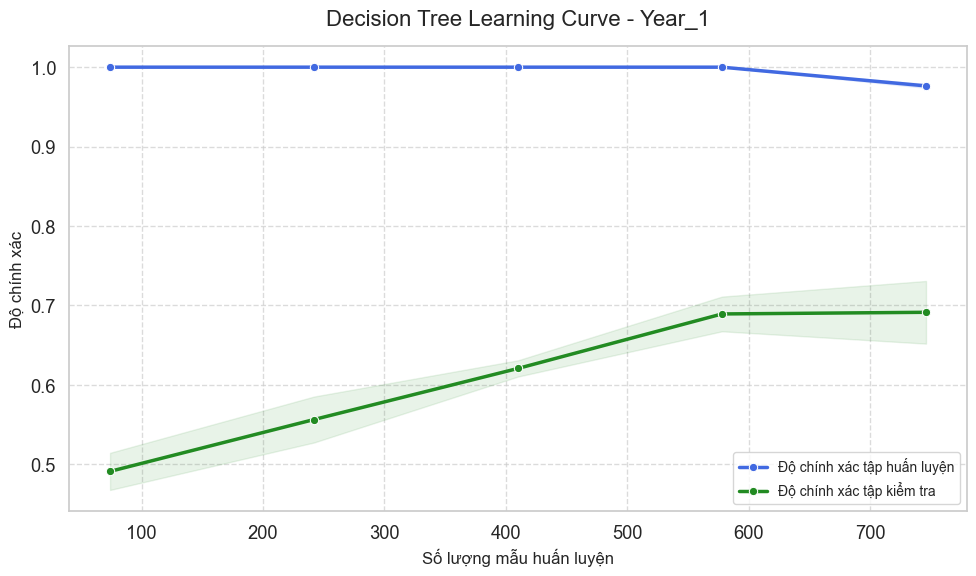


üìà Learning Curve cho SVM - Year_2


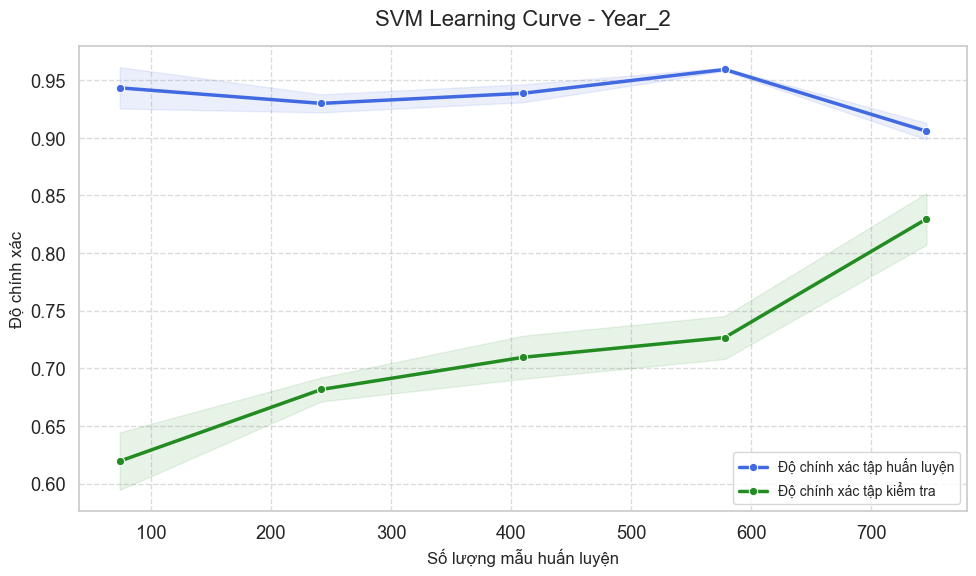


üìà Learning Curve cho SVM - Year_3


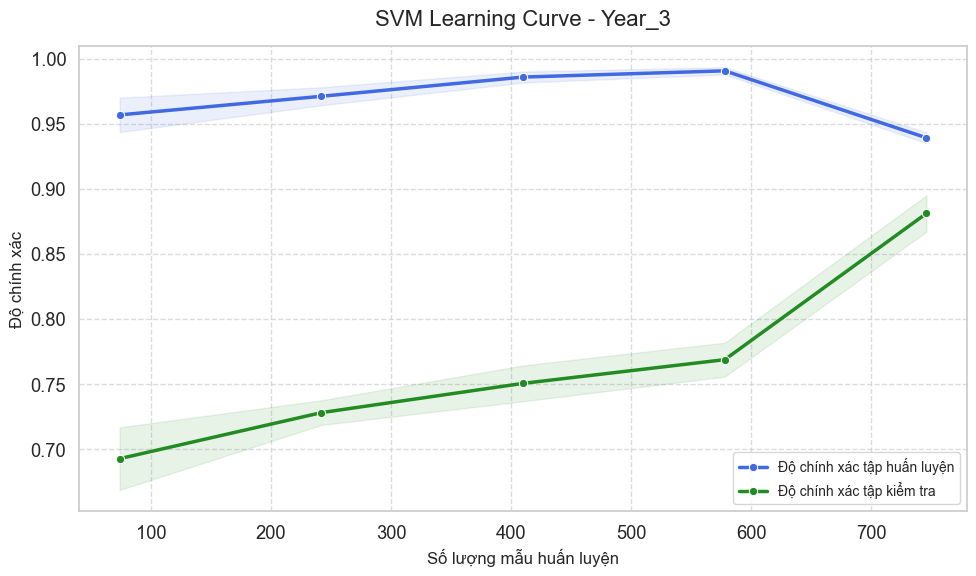


üìà Learning Curve cho Logistic Regression - Year_4


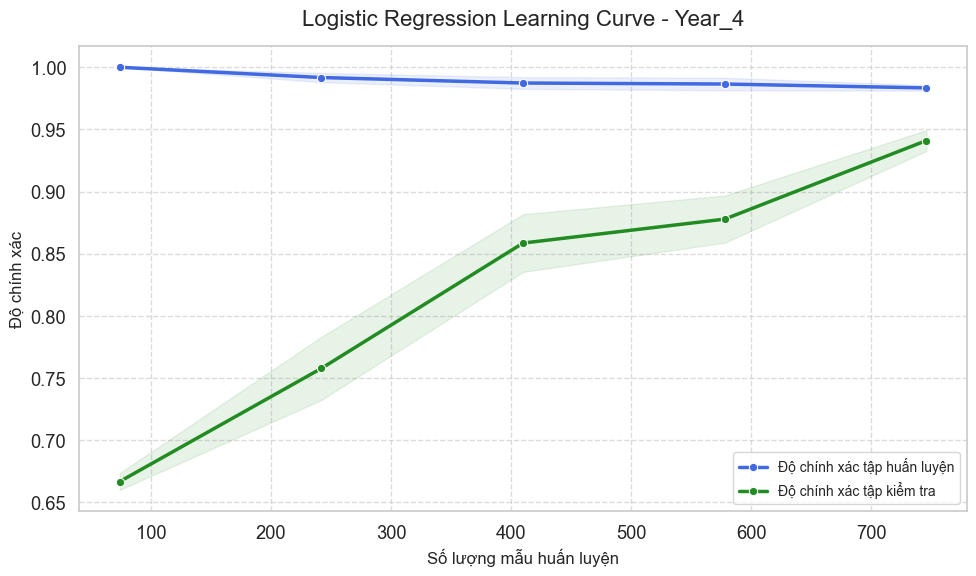


üìä K·∫øt qu·∫£ so s√°nh m√¥ h√¨nh - Year_1:
   NƒÉm          Thu·∫≠t to√°n  Train Accuracy  Test Accuracy  Ch√™nh l·ªách
Year_1       Decision Tree        0.973966       0.692857    0.281109
Year_1                 SVM        0.788668       0.628571    0.160096
Year_1                 KNN        0.753446       0.639286    0.114160
Year_1 Logistic Regression        0.698315       0.596429    0.101887
Year_1         Naive Bayes        0.666156       0.592857    0.073299
‚úÖ M√¥ h√¨nh t·ªët nh·∫•t: Decision Tree v·ªõi Accuracy test = 0.6929

üìä K·∫øt qu·∫£ so s√°nh m√¥ h√¨nh - Year_2:
   NƒÉm          Thu·∫≠t to√°n  Train Accuracy  Test Accuracy  Ch√™nh l·ªách
Year_2       Decision Tree        0.973966       0.750000    0.223966
Year_2                 KNN        0.793262       0.703571    0.089690
Year_2                 SVM        0.894334       0.821429    0.072905
Year_2         Naive Bayes        0.765697       0.721429    0.044268
Year_2 Logistic Regression        0.834609       0.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Set Seaborn style for beautiful plots
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# --- Ti·ªÅn x·ª≠ l√Ω ri√™ng ---
def pre_standard_zero(numeric_columns):
    return ColumnTransformer([
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler())
        ]), numeric_columns)
    ])

def pre_standard_median(numeric_columns):
    return ColumnTransformer([
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_columns)
    ])

def pre_median_only(numeric_columns):
    return ColumnTransformer([
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median'))
        ]), numeric_columns)
    ])

def pre_mean_only(numeric_columns):
    return ColumnTransformer([
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean'))
        ]), numeric_columns)
    ])

# --- H√†m v·∫Ω Learning Curve v·ªõi Seaborn ---
def plot_learning_curve(model, title, X, y, preprocessor, cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=f_classif, k='all')),
        ('classifier', model)
    ])
    train_sizes, train_scores, val_scores = learning_curve(
        pipeline, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring, n_jobs=-1
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title(title, fontsize=16, pad=15)
    plt.xlabel("S·ªë l∆∞·ª£ng m·∫´u hu·∫•n luy·ªán", fontsize=12)
    plt.ylabel("ƒê·ªô ch√≠nh x√°c", fontsize=12)
    
    # Use Seaborn's lineplot for training and validation scores
    sns.lineplot(x=train_sizes, y=train_scores_mean, label="ƒê·ªô ch√≠nh x√°c t·∫≠p hu·∫•n luy·ªán", 
                 color="royalblue", linewidth=2.5, marker="o")
    sns.lineplot(x=train_sizes, y=val_scores_mean, label="ƒê·ªô ch√≠nh x√°c t·∫≠p ki·ªÉm tra", 
                 color="forestgreen", linewidth=2.5, marker="o")
    
    # Add shaded areas for standard deviation
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="royalblue")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="forestgreen")
    
    plt.legend(loc="best", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# --- C·∫•u h√¨nh m√¥ h√¨nh KH√îNG d√πng GridSearch ---
model_configs = {
    'SVM': {
        'model': SVC(),
        'preprocessing': pre_standard_zero
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'preprocessing': pre_standard_median
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'preprocessing': pre_mean_only
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'preprocessing': pre_median_only
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'preprocessing': pre_standard_zero
    }
}

# --- Danh s√°ch file ---
files = [
    ('Year_1_Results_num.xlsx', 'Year_1'),
    ('Year_2_Results_num.xlsx', 'Year_2'),
    ('Year_3_Results_num.xlsx', 'Year_3'),
    ('Year_4_Results_num.xlsx', 'Year_4')
]

# --- K·∫øt qu·∫£ t·ª´ng nƒÉm ---
results_by_year = {}

# --- Hu·∫•n luy·ªán ---
for path, year in files:
    df = pd.read_excel(path)
    X = df.drop(columns=['X·∫øp lo·∫°i', 'M√£ Sinh Vi√™n'])
    y = df['X·∫øp lo·∫°i']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    year_results = []

    for model_name, cfg in model_configs.items():
        preprocessor = cfg['preprocessing'](num_cols)
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('feature_selection', SelectKBest(score_func=f_classif, k='all')),
            ('classifier', cfg['model'])
        ])

        # Hu·∫•n luy·ªán kh√¥ng c·∫ßn GridSearch
        pipeline.fit(X_train, y_train)
        best_model = pipeline

        train_acc = accuracy_score(y_train, best_model.predict(X_train))
        test_acc = accuracy_score(y_test, best_model.predict(X_test))
        gap = train_acc - test_acc

        year_results.append({
            'NƒÉm': year,
            'Thu·∫≠t to√°n': model_name,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Ch√™nh l·ªách': gap
        })

    # L∆∞u k·∫øt qu·∫£
    results_by_year[year] = year_results

    # V·∫Ω learning curve cho m√¥ h√¨nh t·ªët nh·∫•t
    best_model_info = max(year_results, key=lambda x: x['Test Accuracy'])
    best_name = best_model_info['Thu·∫≠t to√°n']
    best_cfg = model_configs[best_name]
    print(f"\nüìà Learning Curve cho {best_name} - {year}")
    plot_learning_curve(best_cfg['model'], f"{best_name} Learning Curve - {year}", X, y, best_cfg['preprocessing'](num_cols), cv)

# --- In k·∫øt qu·∫£ t·ª´ng nƒÉm ---
for year, results in results_by_year.items():
    df_result = pd.DataFrame(results).sort_values(by='Ch√™nh l·ªách', ascending=False)
    print(f"\nüìä K·∫øt qu·∫£ so s√°nh m√¥ h√¨nh - {year}:")
    print(df_result.to_string(index=False))
    best = max(results, key=lambda x: x['Test Accuracy'])
    print(f"‚úÖ M√¥ h√¨nh t·ªët nh·∫•t: {best['Thu·∫≠t to√°n']} v·ªõi Accuracy test = {best['Test Accuracy']:.4f}")

# --- T·ªïng h·ª£p k·∫øt qu·∫£ ---
final_summary = [max(results, key=lambda x: x['Test Accuracy']) for results in results_by_year.values()]
df_summary = pd.DataFrame(final_summary)
print("\nüìå T·ªïng h·ª£p m√¥ h√¨nh t·ªët nh·∫•t theo t·ª´ng nƒÉm:")
print(df_summary.to_string(index=False))

# c√≥ ch·ªânh tham s·ªë

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# --- T·∫°o th∆∞ m·ª•c l∆∞u m√¥ h√¨nh ---
os.makedirs("saved_models", exist_ok=True)

# --- H√†m ti·ªÅn x·ª≠ l√Ω ---
def pre_standard_zero(numeric_columns):
    return ColumnTransformer([
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler())
        ]), numeric_columns)
    ])

def pre_standard_median(numeric_columns):
    return ColumnTransformer([
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_columns)
    ])

def pre_median_only(numeric_columns):
    return ColumnTransformer([
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median'))
        ]), numeric_columns)
    ])

def pre_mean_only(numeric_columns):
    return ColumnTransformer([
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean'))
        ]), numeric_columns)
    ])

# --- H√†m v·∫Ω Learning Curve ---
def plot_learning_curve(model, title, X, y, preprocessor, cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=f_classif, k='all')),
        ('classifier', model)
    ])
    train_sizes, train_scores, val_scores = learning_curve(
        pipeline, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring, n_jobs=-1
    )
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
    plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Accuracy')
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- C·∫•u h√¨nh m√¥ h√¨nh ---
model_configs = {
    'SVM': {
        'model': SVC(),
        'params': {
            'classifier__C': [0.01, 0.1, 1],
            'classifier__gamma': [0.001, 0.01],
            'classifier__kernel': ['rbf']
        },
        'preprocessing': pre_standard_zero  # ‚ùó C·∫ßn chu·∫©n h√≥a d·ªØ li·ªáu cho SVM
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5],
            'classifier__weights': ['uniform', 'distance']
        },
        'preprocessing': pre_standard_median  # ‚ùó C·∫ßn chu·∫©n h√≥a do d·ª±a v√†o kho·∫£ng c√°ch
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {},
        'preprocessing': pre_mean_only  # ‚úîÔ∏è Kh√¥ng c·∫ßn chu·∫©n h√≥a, d√πng gi√° tr·ªã trung b√¨nh
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__max_depth': [3, 5, 10, 15, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 5],
            'classifier__ccp_alpha': [0.0, 0.005, 0.01, 0.02]
        },
        'preprocessing': pre_standard_zero  # ‚úîÔ∏è Kh√¥ng nh·∫°y v·ªõi scale, ch·ªâ c·∫ßn x·ª≠ l√Ω thi·∫øu
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__solver': ['liblinear', 'lbfgs']
        },
        'preprocessing': pre_standard_zero  # ‚úîÔ∏è C·∫ßn chu·∫©n h√≥a; 0 h·ª£p l√Ω cho d·ªØ li·ªáu r·ªùi r·∫°c
    }
}


# --- Danh s√°ch file ---
files = [
    ('Year_1_Results_num.xlsx', 'Year_1'),
    ('Year_2_Results_num.xlsx', 'Year_2'),
    ('Year_3_Results_num.xlsx', 'Year_3'),
    ('Year_4_Results_num.xlsx', 'Year_4')
]

# --- K·∫øt qu·∫£ t·ª´ng nƒÉm ---
results_by_year = {}

# --- Hu·∫•n luy·ªán m√¥ h√¨nh ---
for path, year in files:
    df = pd.read_excel(path)
    X = df.drop(columns=['X·∫øp lo·∫°i', 'M√£ Sinh Vi√™n'])
    y = df['X·∫øp lo·∫°i']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    year_results = []

    for model_name, cfg in model_configs.items():
        preprocessor = cfg['preprocessing'](num_cols)
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('feature_selection', SelectKBest(score_func=f_classif, k='all')),
            ('classifier', cfg['model'])
        ])

        if cfg['params']:
            grid = GridSearchCV(pipeline, cfg['params'], cv=cv, scoring='accuracy', n_jobs=-1)
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
        else:
            pipeline.fit(X_train, y_train)
            best_model = pipeline

        train_acc = accuracy_score(y_train, best_model.predict(X_train))
        test_acc = accuracy_score(y_test, best_model.predict(X_test))
        gap = train_acc - test_acc

        year_results.append({
            'NƒÉm': year,
            'Thu·∫≠t to√°n': model_name,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Ch√™nh l·ªách': gap
        })

    results_by_year[year] = year_results

    # V·∫Ω learning curve cho m√¥ h√¨nh t·ªët nh·∫•t
    best_model_info = max(year_results, key=lambda x: x['Test Accuracy'])
    best_name = best_model_info['Thu·∫≠t to√°n']
    best_cfg = model_configs[best_name]
    print(f"\nüìà Learning Curve cho {best_name} - {year}")
    plot_learning_curve(best_cfg['model'], f"{best_name} Learning Curve - {year}", X, y, best_cfg['preprocessing'](num_cols), cv)

    # L∆∞u m√¥ h√¨nh t·ªët nh·∫•t
    # model_filename = f"saved_models/best_model_{year}_{best_name.replace(' ', '_')}.pkl"
    # joblib.dump(best_model, model_filename)
    # print(f"üíæ ƒê√£ l∆∞u m√¥ h√¨nh t·ªët nh·∫•t cho {year}: {model_filename}")

# --- In k·∫øt qu·∫£ t·ª´ng nƒÉm ---
for year, results in results_by_year.items():
    df_result = pd.DataFrame(results).sort_values(by='Ch√™nh l·ªách', ascending=False)
    print(f"\nüìä K·∫øt qu·∫£ so s√°nh m√¥ h√¨nh - {year}:")
    print(df_result.to_string(index=False))
    best = max(results, key=lambda x: x['Test Accuracy'])
    print(f"‚úÖ M√¥ h√¨nh t·ªët nh·∫•t: {best['Thu·∫≠t to√°n']} v·ªõi Accuracy test = {best['Test Accuracy']:.4f}")

# --- T·ªïng h·ª£p k·∫øt qu·∫£ ---
final_summary = [max(results, key=lambda x: x['Test Accuracy']) for results in results_by_year.values()]
df_summary = pd.DataFrame(final_summary)
print("\nüìå T·ªïng h·ª£p m√¥ h√¨nh t·ªët nh·∫•t theo t·ª´ng nƒÉm:")
print(df_summary.to_string(index=False))


# D·ªØ li·ªáu ch·ªØ

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

# D·ªØ li·ªáu theo nƒÉm
files_uploaded = [
    ('./Year_1_results.xlsx', 'Year_1'),
    ('./Year_2_results.xlsx', 'Year_2'),
    ('./Year_3_results.xlsx', 'Year_3'),
    ('./Year_4_results.xlsx', 'Year_4')
]

# Chu·∫©n h√≥a ƒëi·ªÉm ch·ªØ
valid_grades = ['A', 'B', 'C', 'D', 'E', 'F']
def clean_grade(val):
    try:
        val = str(val).strip().upper()
        return val if val in valid_grades else 'F'
    except:
        return 'F'

# H√†m pipeline theo thu·∫≠t to√°n
def build_pipeline(model_name, config, feature_cols):
    if model_name in ['SVM', 'Logistic Regression', 'KNN']:
        imputer_strategy = 'most_frequent'
    else:
        imputer_strategy = 'constant'
        
    preprocessor = ColumnTransformer([
        ('ordinal', Pipeline([
            ('imputer', SimpleImputer(strategy=imputer_strategy)),
            ('encoder', OrdinalEncoder(categories=[['F', 'E', 'D', 'C', 'B', 'A']] * len(feature_cols),
                                       handle_unknown='use_encoded_value', unknown_value=-1))
        ]), feature_cols)
    ])

    steps = [('preprocessor', preprocessor)]
    if config['scaler']:
        steps.append(('scaler', config['scaler']))
    steps.append(('classifier', config['model']))
    return Pipeline(steps)

# C·∫•u h√¨nh chu·∫©n (nƒÉm 3, 4)
model_configs = {
    'SVM': {
        'model': SVC(probability=True),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__gamma': ['scale', 0.01, 0.1],
            'classifier__kernel': ['rbf']
        },
        'scaler': StandardScaler()
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7, 9, 11],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__p': [1, 2]
        },
        'scaler': StandardScaler()
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__max_depth': [3, 5, 10],
            'classifier__min_samples_leaf': [2, 4, 6],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__ccp_alpha': [0.0, 0.005, 0.01, 0.02]
        },
        'scaler': None
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'classifier__C': [0.01, 0.1, 1, 10, 100],
            'classifier__solver': ['liblinear', 'lbfgs', 'saga'],
            'classifier__penalty': ['l2']
        },
        'scaler': StandardScaler()
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {},
        'scaler': None
    }
}

# C·∫•u h√¨nh t·ªëi ∆∞u ri√™ng cho Year_1 v√† Year_2
model_configs_custom = {
    'SVM': {
        'model': SVC(probability=True),
        'params': {
            'classifier__C': [0.01, 0.05, 0.1, 0.5],  # th√™m gi√° tr·ªã nh·ªè h∆°n ƒë·ªÉ tr√°nh overfitting
            'classifier__gamma': ['scale', 0.01, 0.005],  # th√™m gamma nh·ªè h∆°n ƒë·ªÉ ƒëi·ªÅu ch·ªânh kernel
            'classifier__kernel': ['rbf']
        },
        'scaler': StandardScaler()
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [11, 13, 15, 17],  # tƒÉng n_neighbors ƒë·ªÉ l√†m m∆∞·ª£t quy·∫øt ƒë·ªãnh
            'classifier__weights': ['uniform'],           # chuy·ªÉn v·ªÅ uniform ƒë·ªÉ gi·∫£m ·∫£nh h∆∞·ªüng c·ªßa ƒëi·ªÉm g·∫ßn
            'classifier__p': [2]                          # d√πng kho·∫£ng c√°ch Euclidean ƒë∆°n gi·∫£n, ·ªïn ƒë·ªãnh
        },
        'scaler': StandardScaler()
    },
'Decision Tree': {
    'model': DecisionTreeClassifier(random_state=42),
    'params': {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [3, 4, 5, 6],  # th√™m ƒë·ªô s√¢u 6 n·∫øu d·ªØ li·ªáu kh√¥ng qu√° nhi·ªÅu
        'classifier__min_samples_leaf': [5, 8, 10],  # tƒÉng leaf size
        'classifier__min_samples_split': [10, 15, 20],  # tƒÉng split threshold
        'classifier__ccp_alpha': [0.005, 0.01, 0.02, 0.05]  # th√™m gi√° tr·ªã th·∫•p h∆°n ƒë·ªÉ ki·ªÉm so√°t pruning linh ho·∫°t
    },
    'scaler': None
},

'Logistic Regression': {
    'model': LogisticRegression(max_iter=2000),
    'params': {
        'classifier__C': [0.001, 0.005, 0.01, 0.05, 0.1],  # th√™m C = 0.1 n·∫øu regularization qu√° m·∫°nh
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__penalty': ['l1', 'l2', 'elasticnet'],  # th·ª≠ elasticnet ƒë·ªÉ k·∫øt h·ª£p L1 + L2
        'classifier__l1_ratio': [0.2, 0.5, 0.8]  # n·∫øu d√πng elasticnet ‚Üí c·∫ßn l1_ratio
    },
    'scaler': StandardScaler()
},

    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}, 
        'scaler': None
    }
}


# L∆∞u k·∫øt qu·∫£
results_by_year = {}

for file_path, year in files_uploaded:
    df = pd.read_excel(file_path)
    X = df.drop(columns=['M√£ Sinh Vi√™n', 'X·∫øp lo·∫°i'])
    y = df['X·∫øp lo·∫°i']

    X = X.applymap(clean_grade)

    # Chia d·ªØ li·ªáu theo StratifiedShuffleSplit
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
    for train_idx, test_idx in splitter.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    feature_cols = X.columns
    year_results = []

    # Ch·ªçn c·∫•u h√¨nh ph√π h·ª£p
    config_set = model_configs_custom if year in ['Year_1', 'Year_2'] else model_configs

    for model_name, config in config_set.items():
        pipeline = build_pipeline(model_name, config, feature_cols)

        if config['params']:
            grid = GridSearchCV(pipeline, config['params'], cv=5, n_jobs=-1)
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
        else:
            best_model = pipeline.fit(X_train, y_train)

        train_acc = accuracy_score(y_train, best_model.predict(X_train))
        test_acc = accuracy_score(y_test, best_model.predict(X_test))
        gap = train_acc - test_acc

        year_results.append({
            'NƒÉm': year,
            'Thu·∫≠t to√°n': model_name,
            'Train Accuracy': round(train_acc, 4),
            'Test Accuracy': round(test_acc, 4),
            'Ch√™nh l·ªách': round(gap, 4)
        })

    results_by_year[year] = year_results

# T·ªïng h·ª£p m√¥ h√¨nh t·ªët nh·∫•t m·ªói nƒÉm
final_summary = [max(results, key=lambda x: x['Test Accuracy']) for results in results_by_year.values()]
df_summary = pd.DataFrame(final_summary)

print("\nüìå T·ªïng h·ª£p m√¥ h√¨nh t·ªët nh·∫•t theo t·ª´ng nƒÉm:")
print(df_summary.to_string(index=False))



üìå T·ªïng h·ª£p m√¥ h√¨nh t·ªët nh·∫•t theo t·ª´ng nƒÉm:
   NƒÉm          Thu·∫≠t to√°n  Train Accuracy  Test Accuracy  Ch√™nh l·ªách
Year_1                 SVM          0.7443         0.6714      0.0728
Year_2                 SVM          0.8591         0.8464      0.0127
Year_3                 SVM          0.9433         0.8964      0.0469
Year_4 Logistic Regression          0.9862         0.9571      0.0291


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set Seaborn style for beautiful plots
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# D·ªØ li·ªáu theo nƒÉm
files_uploaded = [
    ('./Year_1_results.xlsx', 'Year_1'),
    ('./Year_2_results.xlsx', 'Year_2'),
    ('./Year_3_results.xlsx', 'Year_3'),
    ('./Year_4_results.xlsx', 'Year_4')
]

# Chu·∫©n h√≥a ƒëi·ªÉm ch·ªØ
valid_grades = ['A', 'B', 'C', 'D', 'F']
def clean_grade(val):
    try:
        val = str(val).strip().upper()
        return val if val in valid_grades else 'F'
    except:
        return 'F'

# H√†m pipeline theo thu·∫≠t to√°n
def build_pipeline(model_name, config, feature_cols):
    if model_name in ['SVM', 'Logistic Regression', 'KNN']:
        imputer_strategy = 'most_frequent'
    else:
        imputer_strategy = 'constant'
        
    preprocessor = ColumnTransformer([
        ('ordinal', Pipeline([
            ('imputer', SimpleImputer(strategy=imputer_strategy)),
            ('encoder', OrdinalEncoder(categories=[['F', 'D', 'C', 'B', 'A']] * len(feature_cols),
                                       handle_unknown='use_encoded_value', unknown_value=-1))
        ]), feature_cols)
    ])

    steps = [('preprocessor', preprocessor)]
    if config['scaler']:
        steps.append(('scaler', config['scaler']))
    steps.append(('classifier', config['model']))
    return Pipeline(steps)

# H√†m v·∫Ω learning curve v·ªõi Seaborn
def plot_learning_curve(estimator, title, X, y, preprocessor, cv, train_sizes=np.linspace(0.1, 1.0, 5)):
    X_preprocessed = preprocessor.fit_transform(X)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_preprocessed, y, cv=cv, n_jobs=-1, train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title(title, fontsize=16, pad=15)
    plt.xlabel("S·ªë l∆∞·ª£ng m·∫´u hu·∫•n luy·ªán", fontsize=12)
    plt.ylabel("ƒê·ªô ch√≠nh x√°c (Accuracy)", fontsize=12)
    
    # Use Seaborn's lineplot for training and cross-validation scores
    sns.lineplot(x=train_sizes, y=train_scores_mean, label="ƒê·ªô ch√≠nh x√°c t·∫≠p hu·∫•n luy·ªán", 
                 color="royalblue", linewidth=2.5, marker="o")
    sns.lineplot(x=train_sizes, y=test_scores_mean, label="ƒê·ªô ch√≠nh x√°c t·∫≠p ki·ªÉm tra", 
                 color="forestgreen", linewidth=2.5, marker="o")
    
    # Add shaded areas for standard deviation
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="royalblue")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="forestgreen")
    
    plt.legend(loc="best", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# C·∫•u h√¨nh chu·∫©n (nƒÉm 3, 4)
model_configs = {
    'SVM': {
        'model': SVC(probability=True),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__gamma': ['scale', 0.01, 0.1],
            'classifier__kernel': ['rbf']
        },
        'scaler': StandardScaler(),
        'preprocessing': lambda cols: ColumnTransformer([
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder(categories=[['F', 'D', 'C', 'B', 'A']] * len(cols),
                                           handle_unknown='use_encoded_value', unknown_value=-1))
            ]), cols)
        ])
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7, 9, 11],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__p': [1, 2]
        },
        'scaler': StandardScaler(),
        'preprocessing': lambda cols: ColumnTransformer([
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder(categories=[['F', 'D', 'C', 'B', 'A']] * len(cols),
                                           handle_unknown='use_encoded_value', unknown_value=-1))
            ]), cols)
        ])
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__max_depth': [3, 5, 10],
            'classifier__min_samples_leaf': [2, 4, 6],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__ccp_alpha': [0.0, 0.005, 0.01, 0.02]
        },
        'scaler': None,
        'preprocessing': lambda cols: ColumnTransformer([
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='constant')),
                ('encoder', OrdinalEncoder(categories=[['F', 'D', 'C', 'B', 'A']] * len(cols),
                                           handle_unknown='use_encoded_value', unknown_value=-1))
            ]), cols)
        ])
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'classifier__C': [0.01, 0.1, 1, 10, 100],
            'classifier__solver': ['liblinear', 'lbfgs', 'saga'],
            'classifier__penalty': ['l2']
        },
        'scaler': StandardScaler(),
        'preprocessing': lambda cols: ColumnTransformer([
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder(categories=[['F', 'D', 'C', 'B', 'A']] * len(cols),
                                           handle_unknown='use_encoded_value', unknown_value=-1))
            ]), cols)
        ])
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {},
        'scaler': None,
        'preprocessing': lambda cols: ColumnTransformer([
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='constant')),
                ('encoder', OrdinalEncoder(categories=[['F', 'D', 'C', 'B', 'A']] * len(cols),
                                           handle_unknown='use_encoded_value', unknown_value=-1))
            ]), cols)
        ])
    }
}

# C·∫•u h√¨nh t·ªëi ∆∞u ri√™ng cho Year_1 v√† Year_2
model_configs_custom = {
    'SVM': {
        'model': SVC(probability=True),
        'params': {
            'classifier__C': [0.01, 0.05, 0.1, 0.5],
            'classifier__gamma': ['scale', 0.01, 0.005],
            'classifier__kernel': ['rbf']
        },
        'scaler': StandardScaler(),
        'preprocessing': lambda cols: ColumnTransformer([
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder(categories=[['F', 'D', 'C', 'B', 'A']] * len(cols),
                                           handle_unknown='use_encoded_value', unknown_value=-1))
            ]), cols)
        ])
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [11, 13, 15, 17],
            'classifier__weights': ['uniform'],
            'classifier__p': [2]
        },
        'scaler': StandardScaler(),
        'preprocessing': lambda cols: ColumnTransformer([
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder(categories=[['F', 'D', 'C', 'B', 'A']] * len(cols),
                                           handle_unknown='use_encoded_value', unknown_value=-1))
            ]), cols)
        ])
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__max_depth': [3, 4, 5, 6],
            'classifier__min_samples_leaf': [5, 8, 10],
            'classifier__min_samples_split': [10, 15, 20],
            'classifier__ccp_alpha': [0.005, 0.01, 0.02, 0.05]
        },
        'scaler': None,
        'preprocessing': lambda cols: ColumnTransformer([
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='constant')),
                ('encoder', OrdinalEncoder(categories=[['F', 'D', 'C', 'B', 'A']] * len(cols),
                                           handle_unknown='use_encoded_value', unknown_value=-1))
            ]), cols)
        ])
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=2000),
        'params': {
            'classifier__C': [0.001, 0.005, 0.01, 0.05, 0.1],
            'classifier__solver': ['liblinear', 'saga'],
            'classifier__penalty': ['l1', 'l2', 'elasticnet'],
            'classifier__l1_ratio': [0.2, 0.5, 0.8]
        },
        'scaler': StandardScaler(),
        'preprocessing': lambda cols: ColumnTransformer([
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder(categories=[['F', 'D', 'C', 'B', 'A']] * len(cols),
                                           handle_unknown='use_encoded_value', unknown_value=-1))
            ]), cols)
        ])
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {},
        'scaler': None,
        'preprocessing': lambda cols: ColumnTransformer([
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='constant')),
                ('encoder', OrdinalEncoder(categories=[['F', 'D', 'C', 'B', 'A']] * len(cols),
                                           handle_unknown='use_encoded_value', unknown_value=-1))
            ]), cols)
        ])
    }
}

# L∆∞u k·∫øt qu·∫£
results_by_year = {}

for file_path, year in files_uploaded:
    df = pd.read_excel(file_path)
    X = df.drop(columns=['M√£ Sinh Vi√™n', 'X·∫øp lo·∫°i'])
    y = df['X·∫øp lo·∫°i']

    X = X.applymap(clean_grade)

    # Chia d·ªØ li·ªáu theo StratifiedShuffleSplit
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
    for train_idx, test_idx in splitter.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    feature_cols = X.columns
    year_results = []

    # Ch·ªçn c·∫•u h√¨nh ph√π h·ª£p
    config_set = model_configs_custom if year in ['Year_1', 'Year_2'] else model_configs

    best_test_acc = -1
    best_model = None
    best_name = None

    for model_name, config in config_set.items():
        pipeline = build_pipeline(model_name, config, feature_cols)

        if config['params']:
            grid = GridSearchCV(pipeline, config['params'], cv=5, n_jobs=-1)
            grid.fit(X_train, y_train)
            model = grid.best_estimator_
        else:
            model = pipeline.fit(X_train, y_train)

        train_acc = accuracy_score(y_train, model.predict(X_train))
        test_acc = accuracy_score(y_test, model.predict(X_test))
        gap = train_acc - test_acc

        year_results.append({
            'NƒÉm': year,
            'Thu·∫≠t to√°n': model_name,
            'Train Accuracy': round(train_acc, 4),
            'Test Accuracy': round(test_acc, 4),
            'Ch√™nh l·ªách': round(gap, 4)
        })

        # L∆∞u l·∫°i m√¥ h√¨nh t·ªët nh·∫•t
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_model = model
            best_name = model_name

        # # B√°o c√°o classification_report
        # y_pred = model.predict(X_test)
        # print(f"\nüìã Classification Report cho {model_name} - {year}:\n")
        # print(classification_report(y_test, y_pred, digits=4))

    results_by_year[year] = year_results
    # L∆∞u m√¥ h√¨nh t·ªët nh·∫•t
    model_filename = f"saved_models/best_model_{year}_{best_name.replace(' ', '_')}.pkl"
    joblib.dump(best_model, model_filename)
    print(f"üíæ ƒê√£ l∆∞u m√¥ h√¨nh t·ªët nh·∫•t cho {year}: {model_filename}")

# T·ªïng h·ª£p m√¥ h√¨nh t·ªët nh·∫•t m·ªói nƒÉm
final_summary = [max(results, key=lambda x: x['Test Accuracy']) for results in results_by_year.values()]
df_summary = pd.DataFrame(final_summary)

print("\nüìå T·ªïng h·ª£p m√¥ h√¨nh t·ªët nh·∫•t theo t·ª´ng nƒÉm:")
print(df_summary.to_string(index=False))


üìã Classification Report cho SVM - Year_1:

                          precision    recall  f1-score   support

                    Gi·ªèi     0.6087    0.7887    0.6871        71
                     Kh√°     0.7278    0.8582    0.7877       134
Ra tr∆∞·ªùng kh√¥ng ƒë√∫ng h·∫°n     1.0000    0.0370    0.0714        27
              Trung B√¨nh     0.0000    0.0000    0.0000         7
                Xu·∫•t S·∫Øc     0.6667    0.1333    0.2222        15

                accuracy                         0.6850       254
               macro avg     0.6006    0.3635    0.3537       254
            weighted avg     0.6998    0.6850    0.6283       254


üìã Classification Report cho KNN - Year_1:

                          precision    recall  f1-score   support

                    Gi·ªèi     0.5556    0.7042    0.6211        71
                     Kh√°     0.7013    0.8060    0.7500       134
Ra tr∆∞·ªùng kh√¥ng ƒë√∫ng h·∫°n     0.5000    0.0370    0.0690        27
              Tru

In [31]:
import joblib

# Load pipeline ƒë√£ l∆∞u
pipeline = joblib.load("saved_models/best_model_Year_1_SVM.pkl")

# In ra c√°c b∆∞·ªõc trong pipeline
print(pipeline)
# print(type(pipeline))



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['F',
                                                                                               'D',
                                                                                               'C',
                                                                                               'B',
                                                                                               'A'],
                                                                                              ['F',
                                        

In [38]:
import joblib
import pandas as pd

# T·∫£i m√¥ h√¨nh
model = joblib.load('saved_models/best_model_Year_1_SVM.pkl')

# Danh s√°ch ƒë·∫ßy ƒë·ªß c√°c c·ªôt m√† m√¥ h√¨nh y√™u c·∫ßu
required_columns = [
    'Kinh T·∫ø Ch√≠nh Tr·ªã M√°c- L√™nin', 'X√°c Su·∫•t Th·ªëng K√™', 'B·∫£o Tr√¨ H·ªá Th·ªëng',
    'Gi·∫£i T√≠ch 1', 'ƒê·∫°i S·ªë Tuy·∫øn T√≠nh', 'Tin H·ªçc ƒê·∫°i C∆∞∆°ng',
    'Tri·∫øt H·ªçc M√°c- L√™nin', 'Nh·∫≠p M√¥n Ng√†nh Cntt', 'Gi·∫£i T√≠ch 2',
    'K·ªπ Thu·∫≠t L·∫≠p Tr√¨nh', 'Ch·ªß Nghƒ©a X√£ H·ªôi Khoa H·ªçc', 'V·∫≠t L√Ω ƒêi·ªán T·ª´'
]

# T·∫°o d·ªØ li·ªáu m·∫´u (gi√° tr·ªã c√≥ th·ªÉ thay ƒë·ªïi t√πy b·∫°n mu·ªën test g√¨)
sample_data = ['A', 'B', 'C', 'A', 'B', 'C', 'D', 'A', 'B', 'C', 'A', 'B']

# T·∫°o DataFrame
input_df = pd.DataFrame([sample_data], columns=required_columns)

# D·ª± ƒëo√°n
try:
    prediction = model.predict(input_df)
    print("K·∫øt qu·∫£ d·ª± ƒëo√°n:", prediction)
except Exception as e:
    print("L·ªói khi d·ª± ƒëo√°n:", str(e))


K·∫øt qu·∫£ d·ª± ƒëo√°n: ['Kh√°']


In [23]:
import pickle
import numpy as np

# ƒê∆∞·ªùng d·∫´n ƒë·∫øn file .pkl
model_file = 'saved_models/best_model_Year_1_SVM.pkl'

# T·∫£i file .pkl v√† ki·ªÉm tra n·ªôi dung
with open(model_file, 'rb') as file:
    model = pickle.load(file)

# In ki·ªÉu c·ªßa model
print("Ki·ªÉu c·ªßa model:", type(model))
print("N·ªôi dung c·ªßa model:", model)

Ki·ªÉu c·ªßa model: <class 'numpy.ndarray'>
N·ªôi dung c·ªßa model: ['Tin H·ªçc ƒê·∫°i C∆∞∆°ng' 'B·∫£o Tr√¨ H·ªá Th·ªëng' 'ƒê·∫°i S·ªë Tuy·∫øn T√≠nh'
 'Nh·∫≠p M√¥n Ng√†nh Cntt' 'Tri·∫øt H·ªçc M√°c- L√™nin' 'V·∫≠t L√Ω ƒêi·ªán T·ª´'
 'Gi·∫£i T√≠ch 1' 'Kinh T·∫ø Ch√≠nh Tr·ªã M√°c- L√™nin' 'K·ªπ Thu·∫≠t L·∫≠p Tr√¨nh'
 'Gi·∫£i T√≠ch 2' 'X√°c Su·∫•t Th·ªëng K√™' 'Ch·ªß Nghƒ©a X√£ H·ªôi Khoa H·ªçc']
